# Exercise 1: Fourier transform of an image  
Download the file `spt_imap_ra5h30dec-55_2008_150ghz_sfl_dr1.fits` from the course web site. This is an image of part of the sky scanned by the South Pole Telescope at a frequency of 150 GHz (in the microwave band). We will work on removing ripples from the background by using a Fourier filter technique.  

1. Use `CCDData.read` from `astropy.nddata` to read in the image and store it as a `CCDData` object. The values are temperatures in units of K, but just use `unit="adu"` for our purposes.


In [20]:
#Code Here
from astropy.nddata import CCDData as CCD
import astropy.units as u
img = CCD.read('spt_imap_ra5h30dec-55_2008_150ghz_sfl_dr1.fits',unit='adu') 


2. Use `Cutout2D` to cut out a 4' x 4' region centered at 05h37m33s, -57d03m22s. Pass the image WCS to `Cutout2D` so the cutout gets a WCS.


In [21]:
#Code Here
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import astropy.wcs
import numpy as np
import matplotlib.pyplot as plt

cut_ctr = SkyCoord("05h37m33s","-57d03m22s",frame='icrs')
cut_dims = np.array([4,4])*u.deg
cut = Cutout2D(img.data,cut_ctr,cut_dims,wcs=img.wcs)



3. Use `numpy.fft.rfft2` to construct the 2D real-complex transform of the cutout data.


In [22]:
#Code Here
fhat = np.fft.rfft2(cut.data)


4. Find the kx- and ky-values using `fftfreq`/`rfftfreq` and create a meshgrid from them. Use the meshgrid to compute $$\|k\|$$ at each point.


In [23]:
#Code Here
N,M = cut.data.shape
kx = np.fft.rfftfreq(N)
ky = np.fft.fftfreq(M)
X,Y= np.meshgrid(kx,ky)

kmag = np.sqrt(X**2+Y**2)


5. Set all the Fourier components with $$\|k\| < 50$$ (number of x-points) to zero and inverse transform. Plot the original and the filtered version using the stretch below ($$f$$ denotes the unstretched image).  
$$
f \rightarrow \frac{\log{[1000(f - f_{\text{min}}) + 1]}}{\log{(1001)}}
$$

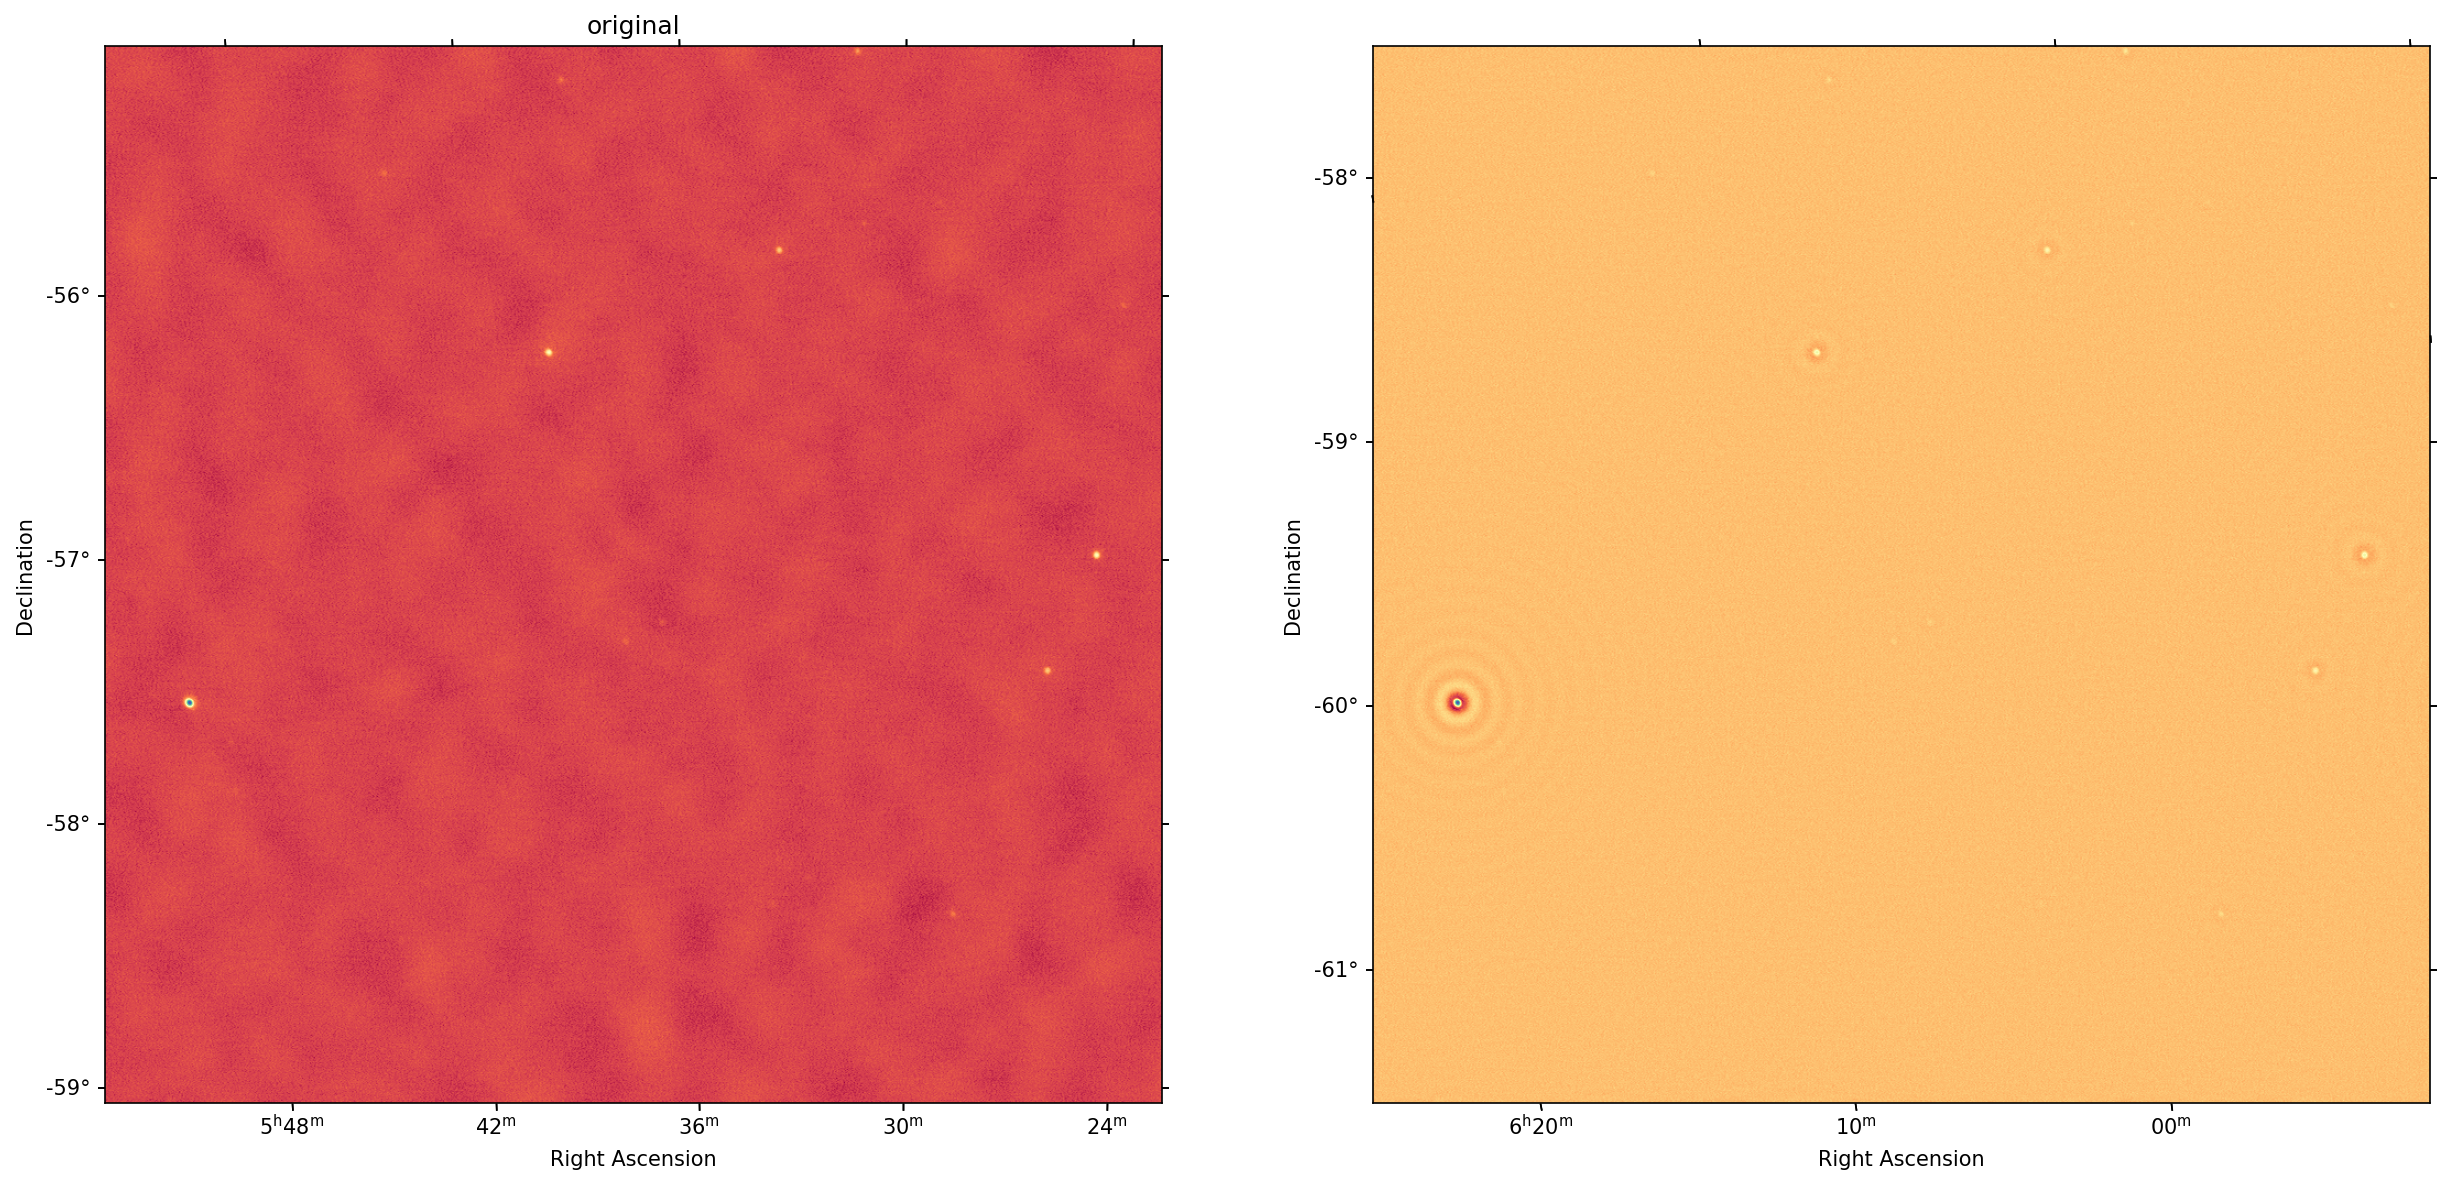

In [24]:
#Code Here
fhat[kmag< 50 / cut.data.shape[0]] = 0

ifhat = np.fft.irfft2(fhat)


cutstretch = np.log10(1000*(cut.data - cut.data.min()) + 1)/np.log10(1001)

ifstretch = np.log10(1000*(ifhat - ifhat.min()) + 1)/np.log10(1001)

fig =plt.figure(figsize=(20,10),dpi=150)
ax1=fig.add_subplot(121,projection=cut.wcs)
ax1.imshow(cutstretch,origin='lower',cmap='Spectral')
ax1.set_title("original")
ax1.set_xlabel("Right Ascension")
ax1.set_ylabel("Declination")
ax2=fig.add_subplot(122,projection=img.wcs)
ax2.imshow(ifstretch,origin='lower',cmap='Spectral')
ax2.set_xlabel("Right Ascension")
ax2.set_ylabel("Declination")
plt.show()

# Exercise 2: unsharp masking

Apply the unsharp mask algorithm to the SPT image we worked with previously (start with the raw cutout data). Use the same cutout region, but before processing it, subtract its minimum value to make sure all values are nonnegative. For the unsharp mask, use $$ \sigma = 10 $$ (pixels), $$ t = 0.1 $$, and $$ s = 100 $$. Plot the result, using a nice colormap so that you can see the remaining background ripples and the rings around the point sources.


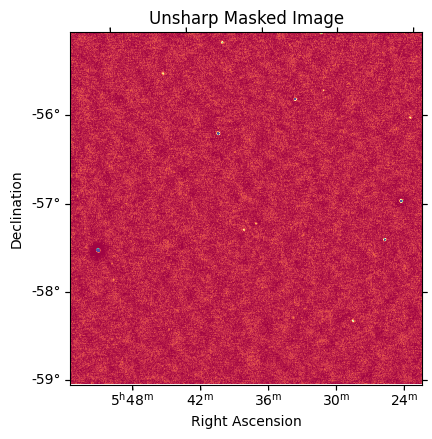

In [27]:
#Code Here
import scipy.ndimage
imcopy = cut.data - cut.data.min()
B = scipy.ndimage.gaussian_filter(imcopy,10)

M = imcopy - B
t = .1
for i in range(cut.data.shape[0]):
    for j in range(cut.data.shape[1]):
        if (M[i][j] > t*imcopy[i][j]):
            imcopy[i][j]+=(100*M[i][j])
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121,projection=cut.wcs)
ax1.set_title("Unsharp Masked Image")
ax1.imshow(imcopy,origin="lower",cmap="Spectral",vmin=0,vmax=.04)
ax1.set_xlabel("Right Ascension")
ax1.set_ylabel("Declination")

plt.show()



In [26]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/lec21_ASTR310.ipynb' --to pdf

ModuleNotFoundError: No module named 'google.colab'